# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [168]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

In [169]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


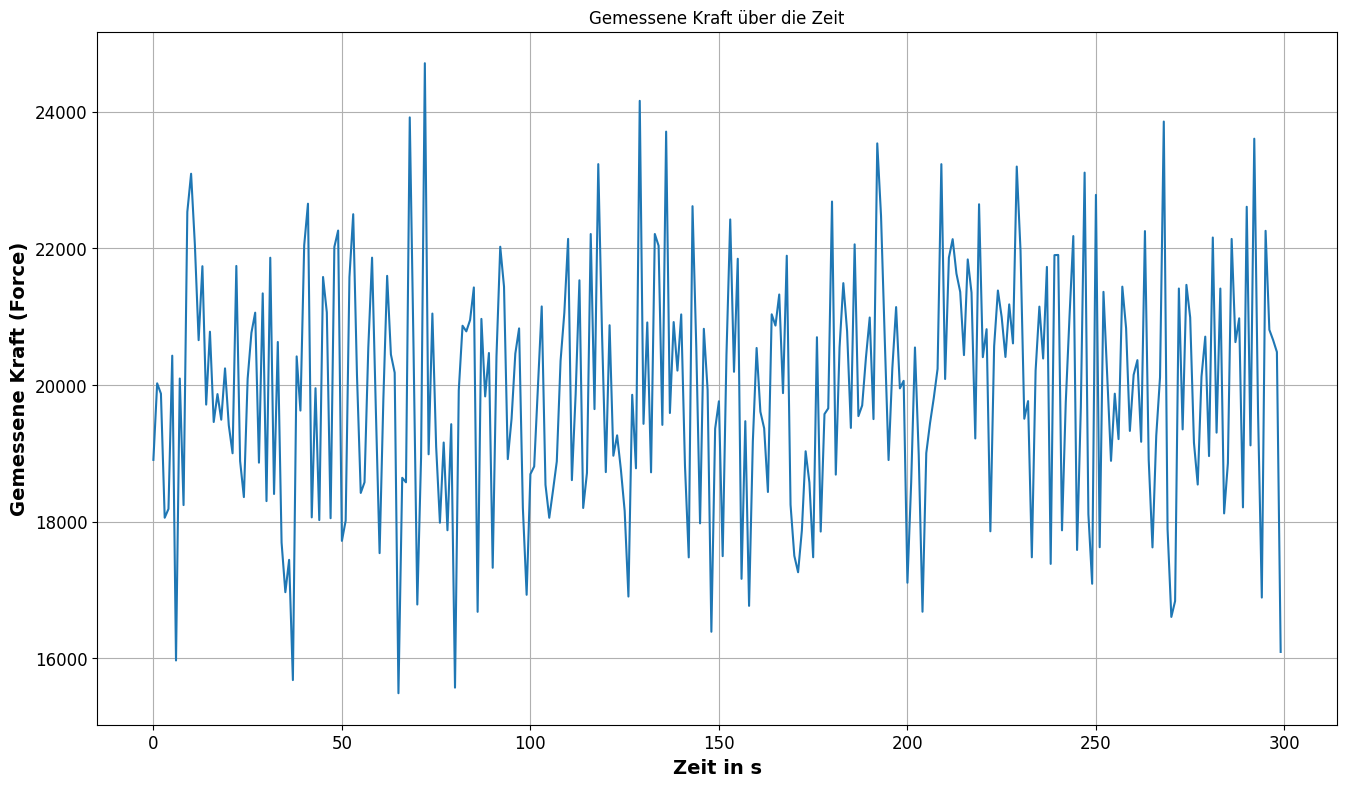

In [170]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
#df.drop("Time", axis = 1, inplace = True)
df.index = df.index.strftime("%H:%M")
df.head()

plt.figure(figsize=(16, 9))
plt.plot(df['Time'], df['F'])
plt.title('Gemessene Kraft über die Zeit')

plt.xlabel("Zeit in s", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
plt.ylabel("Kraft in N", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
plt.xticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
plt.yticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
plt.xscale("linear")

plt.ylabel('Gemessene Kraft (Force)')
plt.grid()
plt.show()

In [171]:
filtered_df = df[df['F'] <= 18000]
filtered_df.head()


,Time,F,d,h1,h2,l
Time,,,,,,
07:42,2022-10-26 07:42:00,15969.394445,-0.031502,-0.046969,-0.080410,-0.033441
08:38,2022-10-26 08:38:00,17695.840912,0.033534,-0.031506,-0.071098,-0.039592
08:40,2022-10-26 08:40:00,16968.687761,0.011802,-0.046347,-0.076916,-0.030570
08:42,2022-10-26 08:42:00,17442.243443,0.029513,-0.041646,-0.059912,-0.018266
08:44,2022-10-26 08:44:00,15682.401992,-0.031538,-0.044601,-0.087096,-0.042495


In [172]:
print("Es sind",len(filtered_df['F']),"Einheiten betroffen")

Es sind 42 Einheiten betroffen


In [173]:
korrelationen = filtered_df[['F', 'd', 'h1', 'h2', 'l']].corr()
print('Korrelationsmatrix:')
print(korrelationen)

Korrelationsmatrix:
           F         d        h1        h2         l
F   1.000000  0.385353  0.376619  0.717650  0.472845
d   0.385353  1.000000 -0.229947 -0.258342 -0.099895
h1  0.376619 -0.229947  1.000000  0.420282 -0.303893
h2  0.717650 -0.258342  0.420282  1.000000  0.736759
l   0.472845 -0.099895 -0.303893  0.736759  1.000000


### Lineare Regression mit Statsmodels

In [174]:
import statsmodels.api as sm

y = df["F"]
X = df[["d", "h1", "h2", "l"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.64e-234
Time:                        22:03:19   Log-Likelihood:                -2115.6
No. Observations:                 300   AIC:                             4239.
Df Residuals:                     296   BIC:                             4254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           2e+04     16.311   1225.976      0.0

Regressionsergebnisse für d:


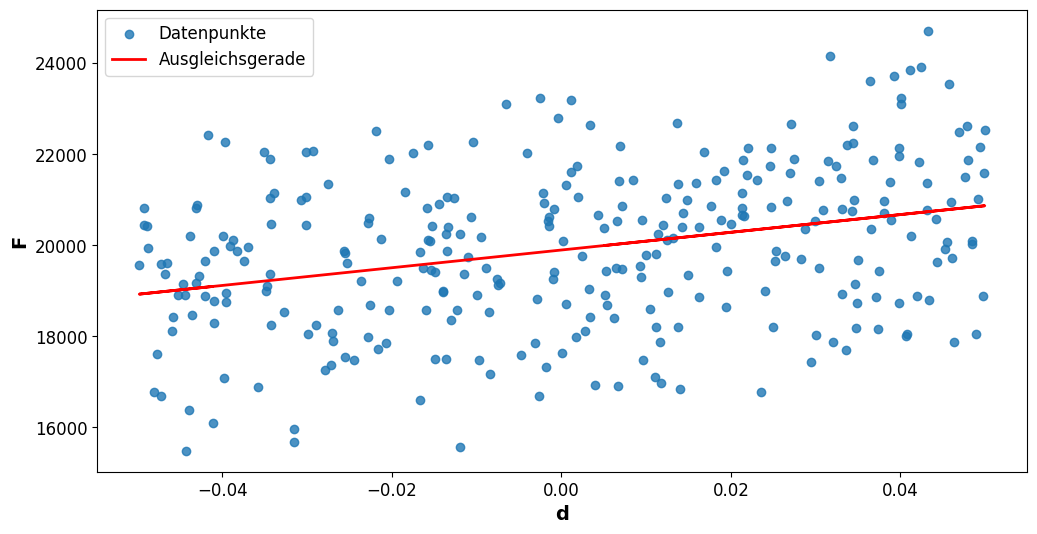

Regressionsergebnisse für h1:


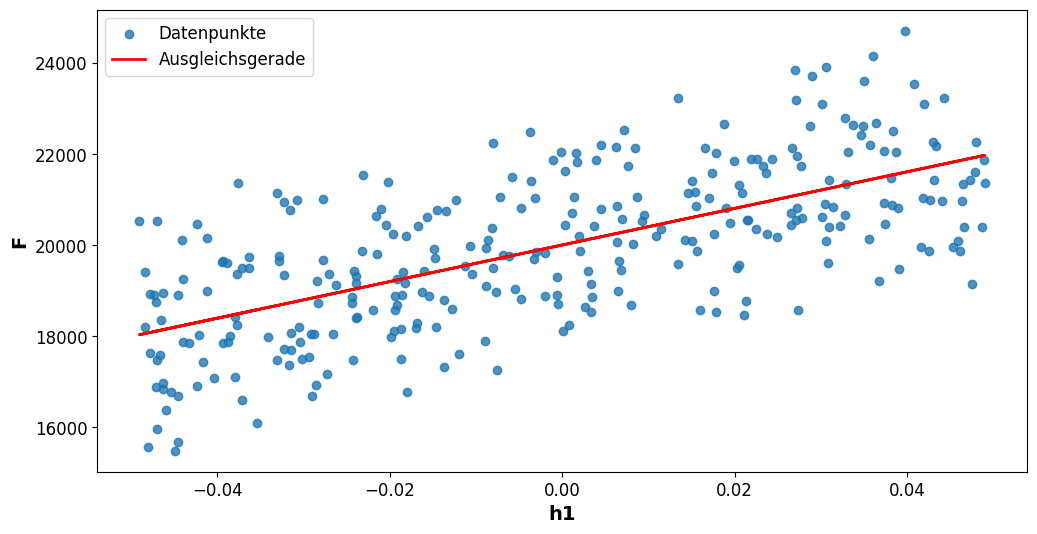

Regressionsergebnisse für h2:


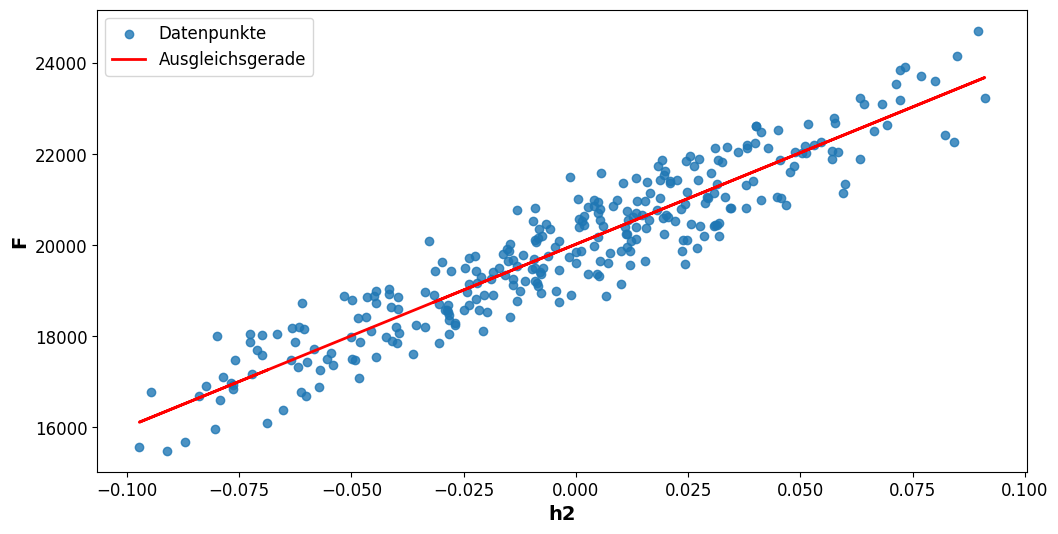

Regressionsergebnisse für l:


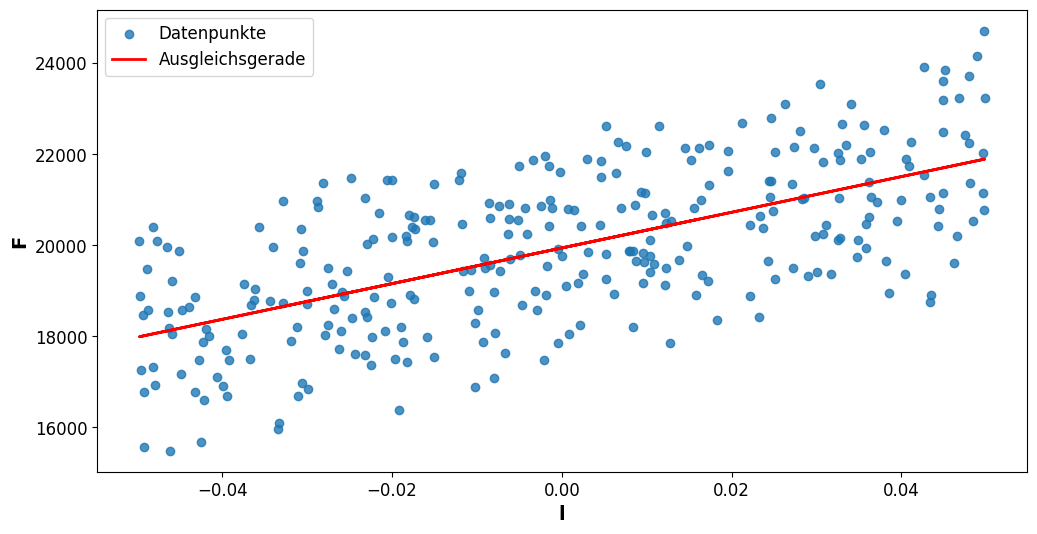

In [175]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt 'df' und enthält die erforderlichen Spalten

# Definieren Sie die abhängige Variable 'F'
y = df["F"]

# Iterieren Sie über die unabhängigen Variablen 'd', 'h1', 'h2', 'l' und führen Sie für jede Variable eine lineare Regression durch
independent_vars = ["d", "h1", "h2", "l"]

for col in independent_vars:
    X = df[col]  # Wählen Sie die aktuelle unabhängige Variable
    X = sm.add_constant(X)  # Hinzufügen einer Konstanten (Intercept)
    model = sm.OLS(y, X).fit()  # Lineare Regression durchführen
    print(f"Regressionsergebnisse für {col}:")
    #print(model.summary())

    # Plotten Sie die Datenpunkte und die Ausgleichsgerade
    plt.figure(figsize=(12, 6))
    plt.scatter(X[col], y, label="Datenpunkte", alpha=0.8)
    plt.plot(X[col], model.params["const"] + model.params[col] * X[col], color="red", label="Ausgleichsgerade", linewidth=2)
    plt.xlabel(col, fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
    plt.ylabel("F", fontsize=14, fontweight="bold")  # Anpassen der Beschriftung
    plt.xticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
    plt.yticks(fontsize=12)  # Anpassen der Achsenbeschriftungen
    plt.legend(fontsize=12)  # Anpassen der Legendenbeschriftung
    plt.show()


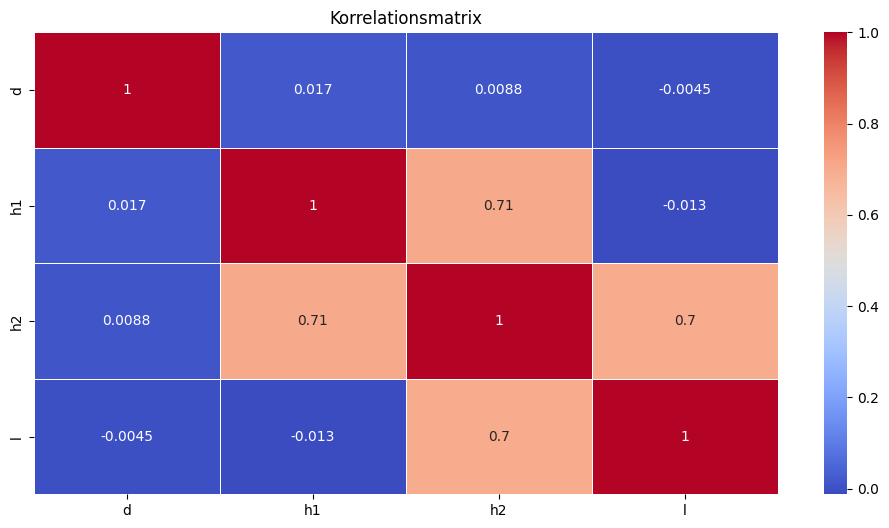

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: Sie haben bereits Ihre Daten in ein DataFrame (df) geladen.
X = df[["d", "h1", "h2", "l"]]
# Berechnen der Korrelationsmatrix
corr_matrix = X.corr()

# Erstellen eines Heatmaps mit Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.show()


In [177]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# Annahme: Ihr DataFrame heißt 'df' und enthält die erforderlichen Spalten

# Entfernen Sie die Datums- und Uhrzeitspalte, da sie für die Regression nicht benötigt wird
df = df.drop("Time", axis=1)

# Normalisieren Sie die verbleibenden Werte auf den Bereich von 0 bis 1
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Definieren Sie die abhängige Variable 'F' und die unabhängigen Variablen 'd', 'h1', 'h2', 'l'
X = normalized_data[['d', 'h1', 'h2', 'l']]
y = normalized_data['F']
# Fügen Sie einen Intercept (Konstante) hinzu
X = sm.add_constant(X)

# Führen Sie die lineare Regression durch
model = sm.OLS(y, X).fit()

# Zeigen Sie eine Zusammenfassung der Regression an
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.64e-234
Time:                        22:03:20   Log-Likelihood:                 623.19
No. Observations:                 300   AIC:                            -1238.
Df Residuals:                     296   BIC:                            -1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.005     -7.396      0.0

Eine lineare Regression ist eine statistische Methode zur Modellierung und Untersuchung der Beziehung zwischen einer abhängigen Variablen (auch Zielvariable genannt) und einer oder mehreren unabhängigen Variablen (auch erklärende Variablen oder Prädiktoren genannt). Die grundlegende Formel für die einfache lineare Regression mit einer unabhängigen Variable lautet:

Einfache lineare Regression:
$$ Y = \beta_0  + \beta_1 * x + \epsilon  $$

Dabei bedeuten die Symbole:

$Y$: Die abhängige Variable (die, die wir vorhersagen möchten). </br>
$X$: Die unabhängige Variable (die, die zur Vorhersage verwendet wird).</br>
$\beta_0$: Der Y-Achsenabschnitt (der Punkt, an dem die Regressionsgerade die Y-Achse schneidet).</br>
$\beta_1$: Die Regressionskoeffizient für die unabhängige Variable (zeigt die Steigung der Regressionsgeraden an).</br>
$\epsilon$: Der Fehlerterm (repräsentiert die Abweichungen zwischen den beobachteten Werten und den vorhergesagten Werten).</br>

Für die multiple lineare Regression mit mehreren unabhängigen Variablen sieht die Formel folgendermaßen aus:

$$ Y = \beta_0  + \beta_1 * x_1  + \beta_2 * x_2 +  + \beta_p * x_p \epsilon  $$

Hier gibt es mehrere unabhängige Variablen $X_1, X_2, \ldots, X_p$, und es gibt entsprechende Koeffizienten $\beta_1, \beta_2, \ldots, \beta_p$ für jede unabhängige Variable.

Die lineare Regression wird verwendet, um die Werte der Koeffizienten $\beta_0, \beta_1, \beta_2, \ldots, \beta_p$ zu schätzen, so dass die vorhergesagte abhängige Variable $Y$ am besten zu den beobachteten Daten passt. Die Methode basiert auf dem Prinzip der kleinsten Quadrate, bei der die Summe der quadrierten Residuen (Abweichungen zwischen den beobachteten und vorhergesagten Werten) minimiert wird, um die besten Schätzungen der Koeffizienten zu finden.

Die nachfolgende Abbildung zeigt die die Stichprobe und die Regressionsgerade.

![](lr.jpg)

---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Fragestellung

## Analyse

## Ergebnis